<a href="https://colab.research.google.com/github/Gnanebo/Heart-disease-prediction/blob/main/Untitled33.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:

!pip install tensorflow pandas scikit-learn matplotlib seaborn


In [113]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [114]:
df = pd.read_csv("/content/heart.csv")


In [115]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [116]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [117]:
df.fillna(df.mean(), inplace=True)

In [118]:
label_encoder = LabelEncoder()

In [119]:
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


In [120]:
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [121]:
df_cleaned_rows = df.dropna()

In [122]:
df_cleaned_columns = df.dropna(axis=1)

In [123]:
df_filled_mean = df.fillna(df.mean())

In [124]:
df_filled_median = df.fillna(df.median())

In [125]:
print(df_filled_mean.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [126]:
columns = [
    "age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang",
    "oldpeak", "slope", "ca", "thal", "target"
]

In [127]:
# df= pd.read_csv(url, names=columns, na_values="oldspeak")
# print(df.head())

In [128]:
# url = "your_data_url_here" # Replace with actual URL of heart.csv data
# df = pd.read_csv(url, names=columns, na_values="oldspeak")
# print(df.head())

In [129]:
url = "/content/heart.csv"  # Replace with the actual path to your heart.csv file
df = pd.read_csv(url, names=columns, na_values="oldspeak")
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
1   63    1   3       145   233    1        0      150      0      2.3      0   
2   37    1   2       130   250    0        1      187      0      3.5      0   
3   41    0   1       130   204    0        0      172      0      1.4      2   
4   56    1   1       120   236    0        1      178      0      0.8      2   

   ca  thal  target  
0  ca  thal  target  
1   0     1       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [130]:
df = df.dropna()

In [131]:
# df.fillna(df.mean(), inplace=True)

In [132]:
url = "/content/heart.csv"  # Replace with the actual path to your heart.csv file
# The 'oldspeak' parameter is likely misinterpreting data, leading to non-numeric values in columns.
# Read the data without this parameter for proper type inference:
df = pd.read_csv(url, names=columns)
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0  age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope   
1   63    1   3       145   233    1        0      150      0      2.3      0   
2   37    1   2       130   250    0        1      187      0      3.5      0   
3   41    0   1       130   204    0        0      172      0      1.4      2   
4   56    1   1       120   236    0        1      178      0      0.8      2   

   ca  thal  target  
0  ca  thal  target  
1   0     1       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [133]:
X = df.drop("target", axis=1)
y = df["target"]

In [134]:
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [135]:
X = df.drop("target", axis=1)
# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN
X = X.dropna()  # Remove rows with NaN values if any were created

y = df["target"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [136]:
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [137]:
X = df.drop("target", axis=1)
# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

# Align X and y before scaling:
X.reset_index(drop=True, inplace=True)  # Reset index of X
y = y[X.index]  # Select only the target values corresponding to the remaining rows in X

X = X.dropna()  # Remove rows with NaN values if any were created

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [138]:
# print(X_train[:5])

In [139]:
X = df.drop("target", axis=1)
# Ensure all columns in X are numeric
X = X.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, invalid parsing will be set as NaN

# Reset index to avoid potential alignment issues later
X.reset_index(drop=True, inplace=True)
y = df["target"].reset_index(drop=True)  # Reset index of y to match X

# Align X and y before scaling:
X = X.dropna()  # Remove rows with NaN values if any were created
# Select only the target values corresponding to the remaining rows in X
y = y[y.index.isin(X.index)]

# Now scale X
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Now you can split the data:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [140]:
# model = Sequential()

In [141]:
from tensorflow.keras.models import Sequential
# from tensorflow import keras
# from keras.models import Sequential

model = Sequential()

In [142]:
# model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense # Import the Dense layer

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [144]:
# model.add(Dropout(0.5))


In [145]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout # Import Dropout

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.5))

In [146]:
model.add(Dense(64, activation='relu'))

In [147]:
model.add(Dropout(0.5))

In [148]:
model.add(Dense(1, activation='sigmoid'))

In [149]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [150]:
# history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


In [151]:
# Before model.fit:

# Convert y_train and y_test to numeric type
y_train = y_train.astype(int)
y_test = y_test.astype(int)

In [152]:
accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy[1] * 100:.2f}%")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4414 - loss: 0.7228 
Test accuracy: 45.90%


In [153]:
# import matplotlib.pyplot as plt

# df.hist(bins=20, figsize=(15, 10))
# plt.tight_layout()
# plt.show()


In [154]:
import matplotlib.pyplot as plt

# Check if df has any numerical or datetime columns before plotting
if df.select_dtypes(include=['number', 'datetime']).empty:
    print("DataFrame does not contain numerical or datetime columns to plot.")
else:
    # Select only numerical features for the histogram
    numerical_df = df.select_dtypes(include=['number', 'datetime'])

    numerical_df.hist(bins=20, figsize=(15, 10))
    plt.tight_layout()
    plt.show()

DataFrame does not contain numerical or datetime columns to plot.


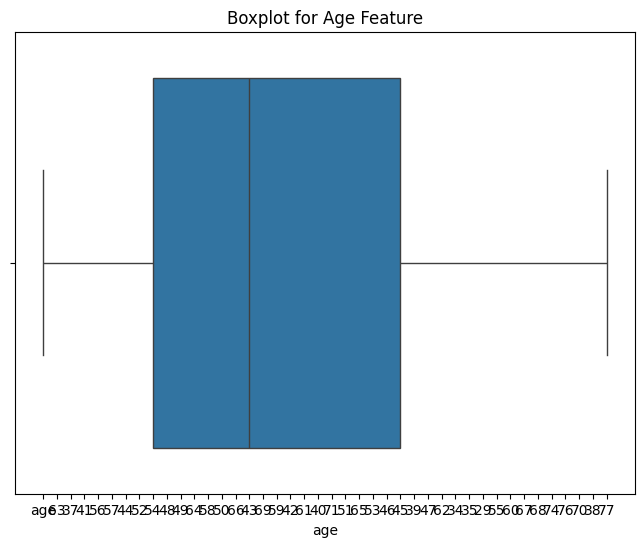

In [155]:
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.boxplot(x=df['age'])
plt.title('Boxplot for Age Feature')
plt.show()


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


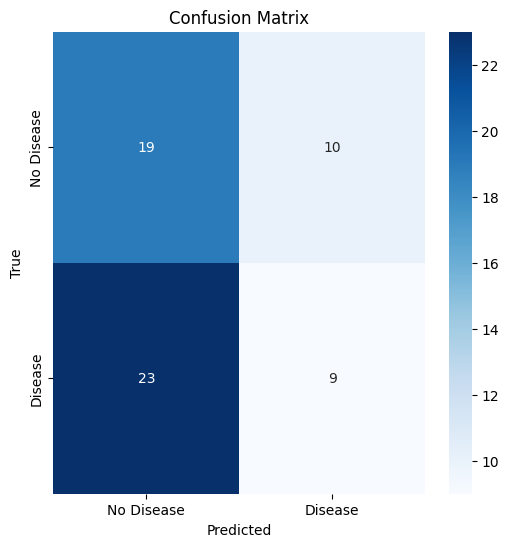

In [156]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Disease', 'Disease'], yticklabels=['No Disease', 'Disease'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [157]:
# import seaborn as sns
# sns.pairplot(df, hue="target", diag_kind="kde", height=2.5)
# plt.show()


In [158]:
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame

# Select only numerical columns for the pairplot
numerical_cols = df.select_dtypes(include=['number']).columns

# Check if numerical_cols is empty and provide feedback or handle it
if numerical_cols.empty:
    print("No numerical columns found for pairplot. Please check your DataFrame.")
else:
    sns.pairplot(df[numerical_cols], hue="target", diag_kind="kde", height=2.5)
    plt.show()

No numerical columns found for pairplot. Please check your DataFrame.
